## Optimizing Hyperparameters for Basel (all years)

## Script content
#### 1. Importing libraries & datasets
#### 2. Data preparation
#### 3. Data reshaping
#### 4. Data Splitting 
#### 5. Hyperparameter Optimization
        5.1 Grid Search
        5.2 Random Search
#### 6. Optimised Random Forest 
#### 7. Feature Importance

## 1. Importing libraries & Datasets

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

2025-08-08 20:22:46.444427: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# define path
path = r'/Users/tanu/Desktop/Data Analytics/ML with python/Data'

In [10]:
# Impor6ting the clean weather data

df = pd.read_csv(os.path.join(path,'weather_cleaned.csv'))
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017

In [12]:
# Import the 'Pleasant weather' dataset

pw = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pw

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Preparation

In [15]:
# Create a list of the columns containing "Basel" in their names

basel_list = list(x for x in df.columns if x.find('BASEL') >=0)
basel_list

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [17]:
# Create a Dataframe with these columns

df_basel = df[basel_list]
df_basel

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1


In [19]:
# Reduce the pleasant weather data to basel answers only

pw_basel = pw['BASEL_pleasant_weather']
pw_basel

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

## 3. Data reshaping

In [22]:
X = np.array(df_basel)
y = np.array(pw_basel)

In [24]:
print (X.shape, y.shape)

(22950, 9) (22950,)


## 4. Data Spliting

In [27]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [31]:
X_train

array([[ 2.    ,  0.69  ,  1.0131, ..., 20.4   , 13.6   , 26.9   ],
       [ 8.    ,  0.82  ,  1.0166, ..., -1.8   , -3.2   , -0.5   ],
       [ 7.    ,  0.84  ,  1.0097, ..., -1.8   , -6.    ,  0.7   ],
       ...,
       [ 6.    ,  0.82  ,  1.018 , ...,  6.3   ,  3.5   , 11.9   ],
       [ 7.    ,  0.7   ,  1.018 , ..., 10.1   ,  8.2   , 15.7   ],
       [ 6.    ,  0.68  ,  1.0195, ..., 11.6   ,  5.1   , 15.8   ]])

In [33]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
X_test

array([[ 6.    ,  0.68  ,  1.0168, ..., 15.1   , 10.8   , 19.5   ],
       [ 8.    ,  0.75  ,  1.013 , ...,  1.2   , -0.2   ,  2.6   ],
       [ 6.    ,  0.73  ,  1.0122, ..., 20.2   , 15.8   , 25.    ],
       ...,
       [ 6.    ,  0.74  ,  1.018 , ...,  8.8   ,  5.9   , 17.6   ],
       [ 6.    ,  0.65  ,  1.0243, ...,  9.3   ,  3.6   , 13.2   ],
       [ 7.    ,  0.83  ,  1.0202, ..., 17.4   , 11.1   , 21.9   ]])

In [39]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

## 5. Hyperparameter Optimization
### 5.1 Grid Search

In [43]:
# Create a RF classifier

clf = RandomForestClassifier()

In [45]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [47]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.958 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.976 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.952 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.975 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.962 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] EN

In [49]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


### Accuracy achieved = 100%

### 5.2 Random Search 

In [52]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [54]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [56]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.941 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.935 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.959 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_

In [58]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 60}
Best RANDOM search score is: 1.0


### Best accuracy achieved : 100%
### even we got 100% accuracy with basel in previous try with n_estimator = 100 and Max_depth = 5

## 6. Running Random Forest with Optimized search parameters

In [64]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=4, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_features=6, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=110)

In [66]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


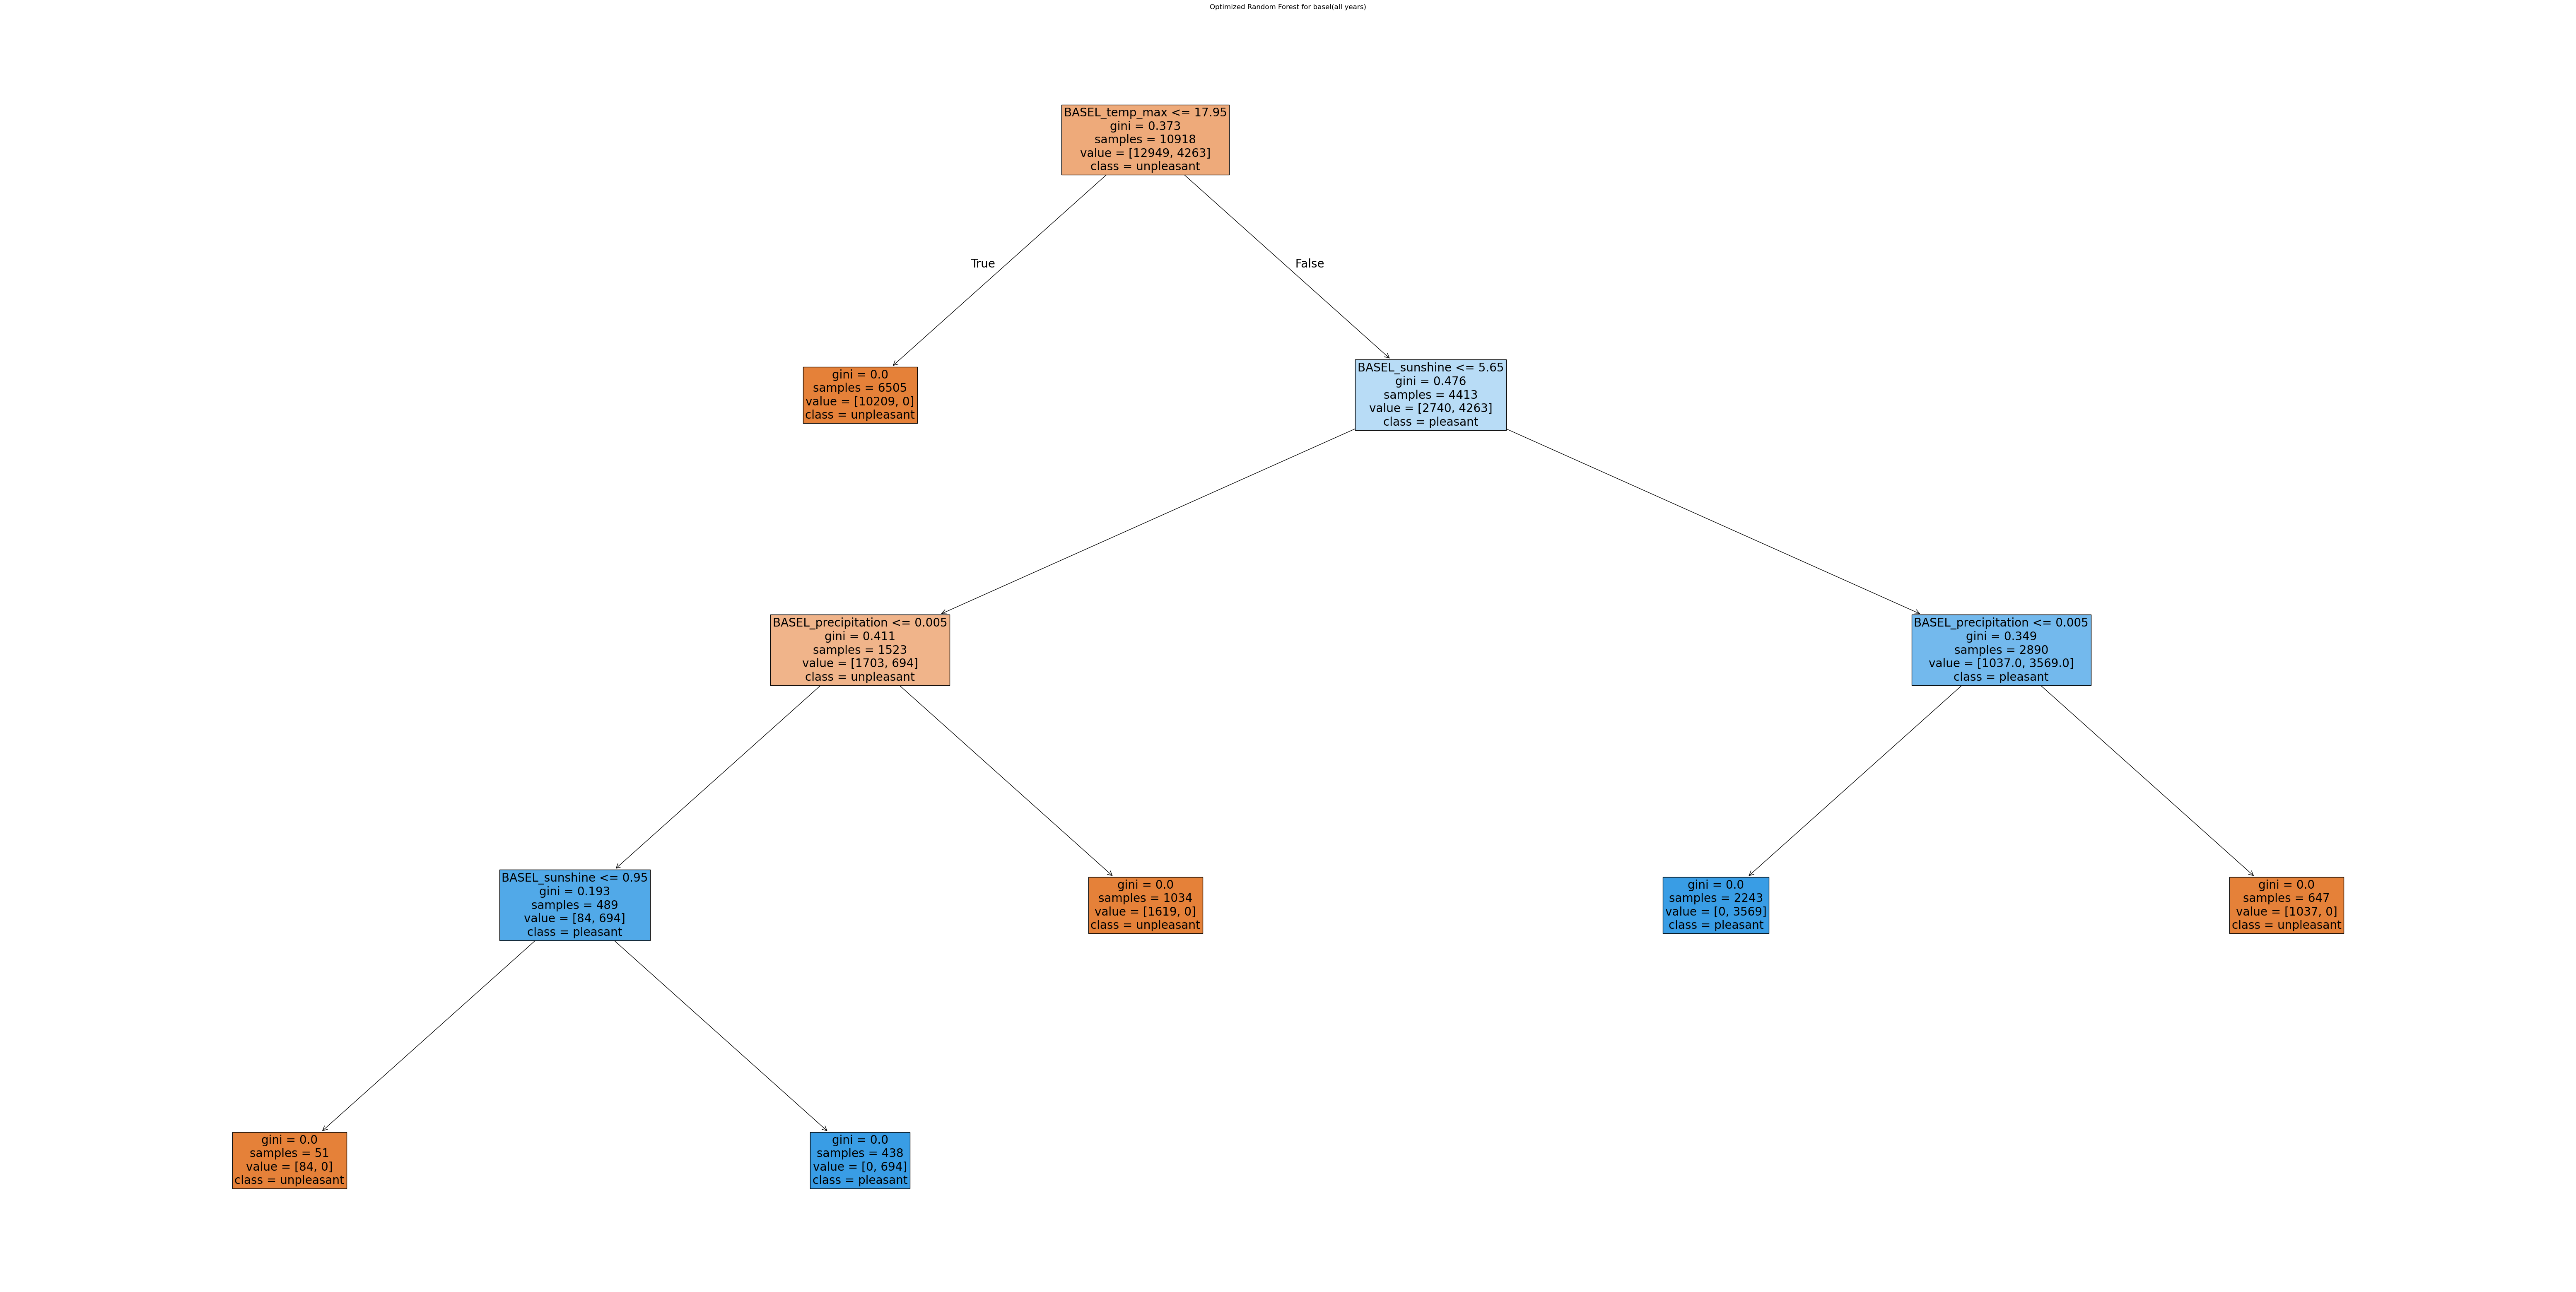

In [76]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_basel.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.title('Optimized Random Forest for basel(all years)');

In [78]:
# save figure
fig.savefig(os.path.join(path, 'optimized_random_forest_Basel.png'),bbox_inches='tight')

## 7. Feature Importance

In [81]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([1.73476089e-02, 5.51897306e-04, 2.00626802e-03, 9.36605273e-02,
       4.19388041e-01, 6.52074860e-02, 2.43751474e-02, 9.69041054e-05,
       3.77366120e-01])

In [85]:
# Create a list of weather features

wx_list = [feature.replace('BASEL_', '') for feature in basel_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [87]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.017348
humidity            0.000552
pressure            0.002006
global_radiation    0.093661
precipitation       0.419388
sunshine            0.065207
temp_mean           0.024375
temp_min            0.000097
temp_max            0.377366
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


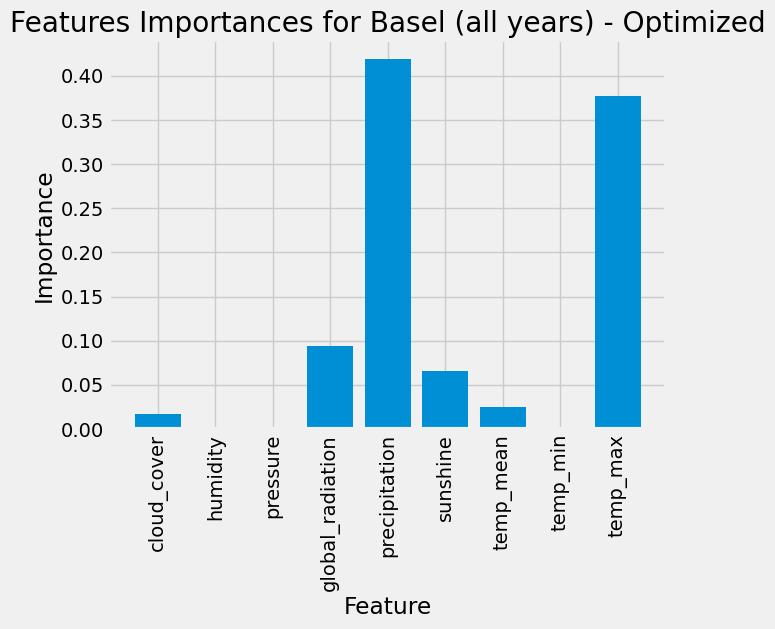

In [89]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Basel (all years) - Optimized');

plt.savefig(os.path.join(path, 'Basel_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()